[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/imeri-course/ai-in-healthcare/blob/master/Session3/Demo_Clustering.ipynb)

# Clustering

From the [Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis):
> Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

In short, clustering is a method that groups several data or objects that similar to each other into several groups (or cluster).

Clustering method often used in learning groups or similarities between data.

In scikit-learn they provide many clustering algorithms, click [here](https://scikit-learn.org/stable/modules/clustering.html)

## Scikit Learn tools for Clustering
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

| Method name                                                  | Parameters                                                   | Scalability                                                  | Usecase                                                      | Geometry (metric used)                       |
| ------------------------------------------------------------ | ------------------------------------------------------------ | ------------------------------------------------------------ | ------------------------------------------------------------ | -------------------------------------------- |
| [K-Means](https://scikit-learn.org/stable/modules/clustering.html#k-means) | number of clusters                                           | Very large `n_samples`, medium `n_clusters` with [MiniBatch code](https://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans) | General-purpose, even cluster size, flat geometry, not too many clusters | Distances between points                     |
| [Affinity propagation](https://scikit-learn.org/stable/modules/clustering.html#affinity-propagation) | damping, sample preference                                   | Not scalable with n_samples                                  | Many clusters, uneven cluster size, non-flat geometry        | Graph distance (e.g. nearest-neighbor graph) |
| [Mean-shift](https://scikit-learn.org/stable/modules/clustering.html#mean-shift) | bandwidth                                                    | Not scalable with `n_samples`                                | Many clusters, uneven cluster size, non-flat geometry        | Distances between points                     |
| [Spectral clustering](https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering) | number of clusters                                           | Medium `n_samples`, small `n_clusters`                       | Few clusters, even cluster size, non-flat geometry           | Graph distance (e.g. nearest-neighbor graph) |
| [Ward hierarchical clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) | number of clusters or distance threshold                     | Large `n_samples` and `n_clusters`                           | Many clusters, possibly connectivity constraints             | Distances between points                     |
| [Agglomerative clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) | number of clusters or distance threshold, linkage type, distance | Large `n_samples` and `n_clusters`                           | Many clusters, possibly connectivity constraints, non Euclidean distances | Any pairwise distance                        |
| [DBSCAN](https://scikit-learn.org/stable/modules/clustering.html#dbscan) | neighborhood size                                            | Very large `n_samples`, medium `n_clusters`                  | Non-flat geometry, uneven cluster sizes                      | Distances between nearest points             |
| [OPTICS](https://scikit-learn.org/stable/modules/clustering.html#optics) | minimum cluster membership                                   | Very large `n_samples`, large `n_clusters`                   | Non-flat geometry, uneven cluster sizes, variable cluster density | Distances between points                     |
| [Gaussian mixtures](https://scikit-learn.org/stable/modules/mixture.html#mixture) | many                                                         | Not scalable                                                 | Flat geometry, good for density estimation                   | Mahalanobis distances to  centers            |
| [Birch](https://scikit-learn.org/stable/modules/clustering.html#birch) | branching factor, threshold, optional global clusterer.      | Large `n_clusters` and `n_samples`                           | Large dataset, outlier removal, data reduction.              |                                              |

# Table of Content:
1. Data Preparation
    1. Select Feature data
    1. Normalization
1. Clustering
    1. Create Model
    1. Fit Model to data
    1. Result and Comparison

# 1. Data Preparation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer

For example in this case, we are going to use breast cancer data.

Breast cancer data is a popular dataset used in many machine learning examples. The data contains recorded breast cancers with several features and two diagnosis, either the cancer is malignant or benign.

In [2]:
# Download Data
! wget https://raw.githubusercontent.com/imeri-course/ai-in-healthcare/master/Session2/breast_cancer_data.csv

In [3]:
# Load Data
breast_cancer = pd.read_csv('breast_cancer_data.csv')
breast_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


To view the data, we will plot it using the first two features of the data, which is `mean radius` and `mean texture` of the cancer recorded

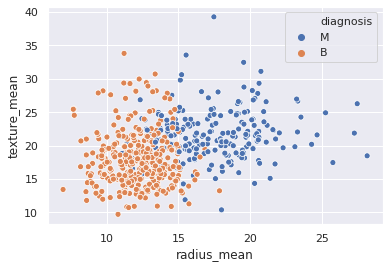

In [4]:
# Check plot between mean radius and mean texture
sns.scatterplot(data=breast_cancer, x="radius_mean", y="texture_mean", hue='diagnosis')

From the plot above, we cannot determine which data belongs to malignant class or which belongs to benign class. With clustering method, we will able to determine which of the data belong to which class.

To use clustering method, we first prepare the data

## 1.1. Select Feature data

In [5]:
# Select only feature data
feature = breast_cancer[breast_cancer.columns[2:-1]]

## 1.2. Normalization

In [6]:
from sklearn.preprocessing import StandardScaler

# Create the object scaler
scaler = StandardScaler()
# Fit to data
scaler.fit(feature)
# Now apply the transformations to the data:
X = scaler.transform(feature)

After preparing the data, we can define the model used. In this example, we will use K-means clustering.

K-means clustering is a clustering method in which the model will group the data into K number of clusters. The value of K is different on other data and can be tuned to match data better.

Since we want to group the data into 2 class of cancer (benign and malignant), we will use `K = 2` in our clustering method.

# 2. Clustering

## 2.1. Create Model

In [7]:
from sklearn.cluster import KMeans

# Create the object model
n_cluster = 2
model = KMeans(n_clusters=n_cluster, init="k-means++", n_init=10)

After building the model, we can fit it to the data and get our cluster prediction

## 2.2. Fit Model to data

In [8]:
# Fit to data
model.fit(X)
# Predict
km_pred = model.predict(X)

## 2.3. Result and Comparison

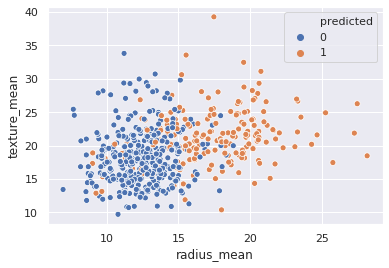

In [9]:
dataset = breast_cancer.join(pd.DataFrame(km_pred, columns=["predicted"]))
sns.scatterplot(data=dataset, x="radius_mean", y="texture_mean", hue="predicted")

And compare with the actual cluster in the data

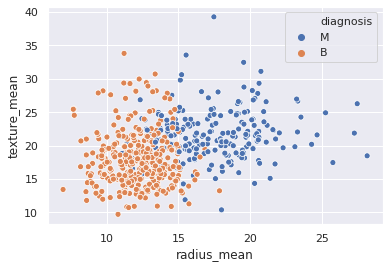

In [10]:
sns.scatterplot(data=dataset, x="radius_mean", y="texture_mean", hue="diagnosis")

From our result, we can conclude that the model is able to cluster the majority of datapoints we have in the dataset, although you may notice that some data is not correctly clustered.